# make plot CuT 1e-6 ENT=1e-5

In [1]:
% housekeeping
% clear data and number format
clear; format short e
% turn off warnings
warning off
graphics_toolkit ("notebook"); 
%graphics_toolkit ("plotly"); 
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt(1:n-12);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB']; addpath(JEQUILIBpath);
Cumodelspath=[rootpath,'/Cu_EN']; addpath(Cumodelspath);

In [2]:
% set constants

pHv=2:0.25:10; CuT=1e-6; ENT=1e-5;

In [3]:
% make model with higher resolutions so plot line is smooth

% MODEL FOR COMPARISON
%model with just inorganic speciation
%geochemical model
% input the constants and solution chemistry

flag1=2; %flag1 for concentration based search vector (1) or for log based search vector (2).
flag2=1; %flag2 for numerical derivatives (2) or analtyical derivatives (1)
database=[]; 
flag3=0; % flag3 1 for show warnings. 0 no warnings
flag4=0; %if=1 solve tableau one line at a time to get a good initial guess (no solids). really challenging probs only
flag5=0; %if=1 use stored initial guess for including solids

inorganicTOTALS=[CuT ENT];
inorganicTOTALS(inorganicTOTALS==0)=1e-16; % get rid of zero values, b/c div by zero error
TOTALS=[inorganicTOTALS]; %TOTALS=inorganicTOTALS;

for i=1:length(pHv);
    pH=pHv(i); pe=20.75-pH; PCO2=10^-3.5;
    [Cuall(i),CuOH,CuOH2s,CuOs,CuCO3s,tenorite,malachite,MASSERR]=CuOHCO2open_EN_allsolids(pH,pe,PCO2,TOTALS',flag1,flag2,flag3,flag4,flag5,database);
end


In [4]:
% experimental data

pH2=[9.57 7.97 7.153 3.11 2.092];
logCuA2=[-12.5608 -11.1824	-8.32432 	-5.72973	-6];
logCuB2=[-14.8209 -13.0608 -9.47973 -5.90541 -6];
logCumodel2=[-14.0232	-12.3392	-8.35787	-6.00004	-6];

pH1=[9.01 7.164 6.225 3.73 2.372];
logCuA1=[-12.848 -9.65878 -6.99324 -4.58108 -6];
logCuB1=[-14.848 	-11.4932 	-8.55743	-5.88851	-6];
logCumodel1=[-13.4464	-9.56087	-7.20236	-6.00014	-6]

logCumodel1,1,2,3,4,5
1,-13.4464,-9.56087,-7.20236,-6.00014,-6


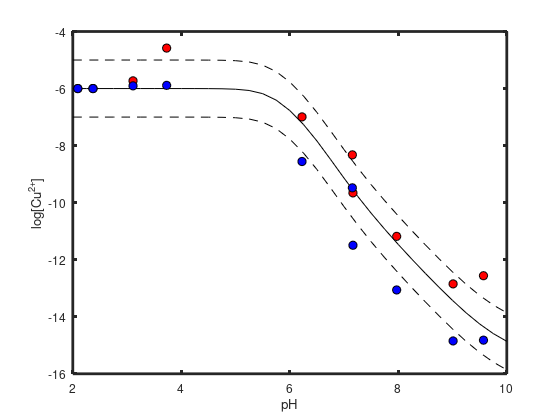

In [5]:
% make plot

plot(pHv,log10(Cuall),'k-', pHv,log10(Cuall*10),'k--', pHv,log10(Cuall./10),'k--')
hold on
plot(pH1,logCuA1,'ko','markerfacecolor','r')
plot(pH2,logCuA2,'ko','markerfacecolor','r')
plot(pH1,logCuB1,'ko','markerfacecolor','b')
plot(pH2,logCuB2,'ko','markerfacecolor','b')
xlabel('pH'); ylabel('log[Cu^{2+}]')
set(gca,'linewidth',2,'fontsize',12)

In [6]:
pH1
logCuA1
logCuB1

pH2
logCuB1
logCuB2

pHv'
log10(Cuall)

pH1,1,2,3,4,5
1,9.01,7.164,6.225,3.73,2.372


logCuA1,1,2,3,4,5
1,-12.848,-9.65878,-6.99324,-4.58108,-6


logCuB1,1,2,3,4,5
1,-14.848,-11.4932,-8.55743,-5.88851,-6


pH2,1,2,3,4,5
1,9.57,7.97,7.153,3.11,2.092


logCuB1,1,2,3,4,5
1,-14.848,-11.4932,-8.55743,-5.88851,-6


logCuB2,1,2,3,4,5
1,-14.8209,-13.0608,-9.47973,-5.90541,-6


ans,1
1,2
2,2.25
3,2.5
4,2.75
5,3
6,3.25
7,3.5
8,3.75
9,4
10,4.25


ans,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
1,-6,-6,-6,-6.00001,-6.00002,-6.00003,-6.00006,-6.00015,-6.00036,-6.00096,-6.0027,-6.00788,-6.02329,-6.06725,-6.17857,-6.40663,-6.77124,-7.25554,-7.83684,-8.48172,-9.14068,-9.77494,-10.371,-10.9321,-11.4667,-11.9819,-12.4815,-12.9652,-13.4284,-13.8623,-14.2539,-14.5892,-14.862
